1a)
Compute the gradient ∇F and the Hessian HF of the Rosenbrock function. Show that x∗ = (1, 1)⊤ is the only local
minimizer of this function and that the Hessian matrix at this point is positive definite.
F= 100(y-x^2)^2 +(1-x)^2.
This function is used as an artificial landscape.
$$ \nabla F(x,x) = (df/dx , df/dy)^T = (  -2x*2*100(y-x^2)-2(1-x), 200(y-x^2)  )^T = (-400x(y-x^2)-2(1-x), 200(y-x^2) )^T 
=( 400x^3-400xy -2(1-x), 200(y-x^2) )^T $$

$$
\text{ The Hessian Matrix of F}:
\begin{bmatrix}
    \frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
    \frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix}
$$
$$\text{ The Hessian Matrix of F}:
\begin{bmatrix}
    1200x^2-400y +2 & -400x \\
    -400x & 200
\end{bmatrix}
$$

To show that (1,1)^T is the only local minimizer we first show that the gradient is 0 at (1,1), then that the Hessian at this point is positive definite (i.e. <Az,z> >0) giving the knowlage that, in a neighbourhood centerd at (1,1), F(x,y)  is convex. This will show that (1,1)^T is a local minimizer.
$$\nabla F(1,1) = (400-400-0 , 200(0) )^T = (0,0)^T $$
$$ 
\text{ The Hessian Matrix at (1,1):}:
\begin{bmatrix}
    802 & -400 \\
    -400 & 200
\end{bmatrix}
$$
<Az,z> >0 for all z in the neighbourhood? 
$$
\begin{align}
\begin{bmatrix}
v & w
\end{bmatrix}
\begin{bmatrix}
802 & -400 \\
-400 & 200
\end{bmatrix}
\begin{bmatrix}
v \\
w
\end{bmatrix}
=
\begin{bmatrix}
v & w
\end{bmatrix}
\begin{bmatrix}
802x -400y \\
-400x +200y
\end{bmatrix}
= 802x^2 - 800yx +200y^2 >0 \text{ in the neigbourhood of (1,1)}
\end{align} $$
Thus since the gradient is zero at (1,1) and the Hessian is positive definite, it is clear that the Rosenbrock function in two dimentions has a local minium obtained by the local minimizer (1,1)^T ; F(1,1) <F(x,y) for (x,y) in a neighbourhood of (1,1)

$$
1b) G(x,y)= = 8x + 12y + x^2−2y^2. \nabla G =( 2x+8 ,-4y+12 )^T
$$
$$
\text{Hessian}
\begin{bmatrix}
2&0 \\
0&-4
\end{bmatrix}
$$
Because the gradient consists of linear functions it is clear that there is only one point where $$ \nabla G =0; (x,y)=(-4,3)
 $$
And the hessian is the same for all points with Determinant = -8 wich implies that the stationary point, (-4,3), is neither a maximum nor a minimum, since a negative determinant of this hessian implies that two eigenvalues have different signs.
$$
trasH;
\begin{align*}
\begin{bmatrix}
v & w
\end{bmatrix}
\begin{bmatrix}
2&0 \\
0&-4
\end{bmatrix}
\begin{bmatrix}
v \\
w
\end{bmatrix}
=2x^2 -4y^2
\end{align*}
$$


<function matplotlib.pyplot.show(close=None, block=None)>

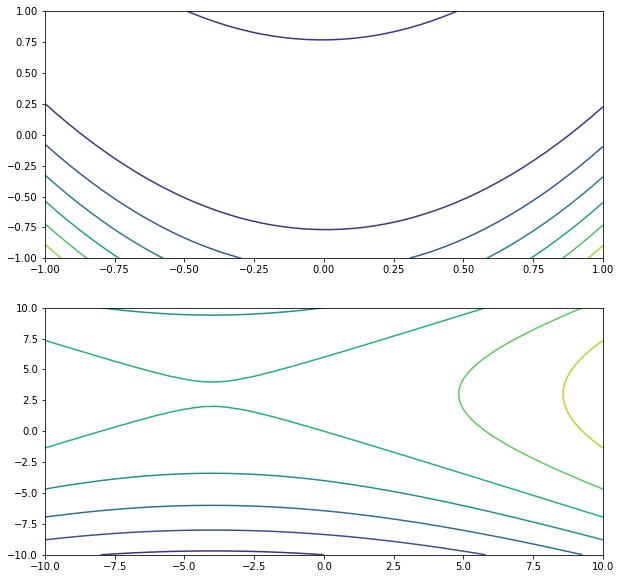

In [51]:
#1c)
import numpy as np
import matplotlib.pyplot as plt


def F(x, y):
    return 100*(y-x**2)**2 +(1-x)**2
#want to create given Domain;
xf= np.linspace(-1,1)
yf=np.linspace(-1,1)
def G(x, y):
    return 8*x + 12*y + x**2 - 2*y**2
#want to create given Domain;
xg= np.linspace(-10,10)
yg=np.linspace(-10,10)

#to not have dimention error for countorplot;
X,Y =np.meshgrid(xf,yf)
Q,Z = np.meshgrid(xg,yg)

Fplot=F(X,Y)
Gplot=G(Q,Z)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.contour(X,Y,Fplot) #looks about right (how should i know about the meshgrid)
plt.subplot(2,1,2)

plt.contour(Q,Z,Gplot) # looks about right
plt.show

 2)I reverted to checkpoint, so lost work. But  found that, by computing the jacobian for a couple of G(x,y) to find a contraction mapping G;
 G(x,y)= [y/sqrt(5), (1/4)((sin(x)+cos(y)]  that converges for D={-1/sqrt(5)<x<1/sqrt(5), -1/4<y<1/4} is sufficient.
 (mabye need to compute J again.. and show more about D)
 

In [58]:
import numpy as np

def FixedPoint(G, x0, tol, maxiter):
    x, y = x0[0], x0[1]
    for i in range(maxiter):  
        xnew, ynew = G(x,y)
    
        if np.linalg.norm([x-xnew,y-ynew]) < tol:
             return xnew, ynew, i
        x, y = xnew, ynew
    return x, y,i

x0 = [0, 0] # funker jo for alle D.. men hvis 
x,y=x0[0],x0[1]
tolerance = 10**(-7)
maxiterations = 5001
def G(x,y):
    return [ y / np.sqrt(5),(1/4)*(np.sin(x) + np.cos(y))]

result = FixedPoint(G, x0, tolerance, maxiterations)
print("Fixed Point (x, y):", result)



Fixed Point (x, y): (0.12124192276246332, 0.2711051446137593, 15)


In [59]:
import numpy as np

def Broyden(F, JF, x0, tol, maxiter, alpha=1):
    B = JF
    x = x0
    for k in range(maxiter):
        Fx = F(x)

        d = np.linalg.solve(B, -Fx)
        xnext = x + alpha * d
        Fxnext = F(xnext)

        s = xnext - x
        y = Fxnext - Fx

        Bs = B @ s
        B += np.outer(y - Bs, s) / (s @ s)

        x = xnext

        if np.linalg.norm(y) < tol:
            return x,k

    raise Exception("Broyden's method did not converge")

def system(x):
    return np.array([
        5*x[0]**2 -x[1]**2,
        x[1] - (1/4) * (np.sin(x[0]) + np.cos(x[1]))
    ])
JF= [[10*0.1,-2*0.25],[1,1]]#[(1/4)*np.cos(0.1),(1/4)*np.sin(0.25)]]]
x0 = [0.1, 0.25]
maxiter = 5001  
tolerance = 10**(-7)  

solution = Broyden(system, JF, x0, tolerance, maxiter)
print("Solution:", solution)





Solution: (array([0.12124191, 0.27110516]), 5)


In [60]:
import time
import time

start_time = time.time()
sol=FixedPoint(G, x0, tolerance, maxiter)
end_time = time.time()
elapsed_time = end_time - start_time
# Print the elapsed time in seconds
print(f"Time taken on Fixed point: {elapsed_time} seconds and",sol[2], "iterations")


start_time = time.time()
solution = Broyden(system, JF, x0, tolerance, maxiter)
end_time = time.time()
elapsed_time = end_time - start_time
# Print the elapsed time in seconds
print(f"Time taken Brodyen: {elapsed_time} seconds","and",solution[1],"iteration")


Time taken on Fixed point: 0.0040285587310791016 seconds and 12 iterations
Time taken Brodyen: 0.0 seconds and 5 iteration


So... time is similar.... Broyden uses less iterations but more time for each one